In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from PIL.ExifTags import TAGS
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
img = cv2.imread("20170311_172915.jpg", 0)
img2 = cv2.imread("frc_live_grid_shot.jpg", 0)
cone_template = cv2.imread("frc_cone_template.jpg", 0)
april_template = cv2.imread("frc_april_template.jpg", 0)

april_pure_1 = cv2.imread("april_tag_pure_1.png", 0)

(5312, 2988)
(5312, 2988)


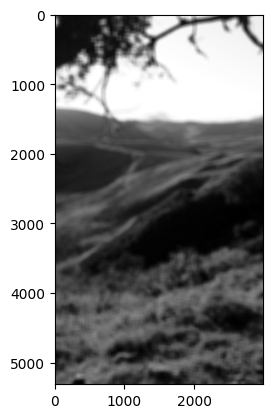

In [4]:
window_size = 75
avg_kernel = np.ones((window_size, window_size), np.float32) / (window_size**2)
avg_img = cv2.filter2D((img / 255.0), -1, kernel=avg_kernel)

print(img.shape)
print(avg_img.shape)

plt.imshow(avg_img, cmap="Greys_r")
plt.show()

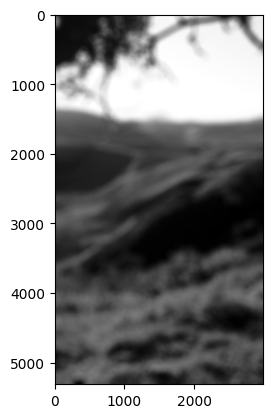

In [48]:
half_region = 75
radius = ((2 * half_region) + 1) / 2

point_sim = np.random.uniform(-1 * radius, radius, size=(10000000, 2))
in_circle = np.sqrt((point_sim[:, 0] ** 2) + (point_sim[:, 1]**2)) <= radius
point_sim = pd.DataFrame(
    np.floor(point_sim + radius).astype("int"),
    columns=["u", "v"]
)
point_sim["in_circle"] = in_circle

circle_kernel = point_sim.groupby(["u", "v"])["in_circle"].mean().unstack().values
circle_kernel / circle_kernel.sum()

circle_avg_img = cv2.filter2D((img / 255.0), -1, kernel=circle_kernel)

plt.imshow(circle_avg_img, cmap="Greys_r")
plt.show()


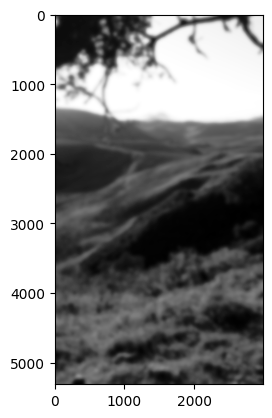

In [97]:
stand_dev = 25
half_region = int(3 * stand_dev)
full_region = (2 * half_region) + 1

v = np.arange(-1 * half_region, half_region + 1)[::-1]
v = v.reshape(v.shape[0], 1)
v = np.repeat(v, full_region, axis=1)

u = -1 * v.T

non_sqrt_euc = (v**2 + u**2)

def calc_gauss_kernel(non_sqrt_euc, sigma):
    denom = (1 / (2 * np.pi * (sigma**2)))
    num = np.exp((-1 * non_sqrt_euc) / (2 * (sigma**2)))
    return denom * num

gauss_kernel = calc_gauss_kernel(non_sqrt_euc, stand_dev)
gauss_kernel = gauss_kernel / gauss_kernel.sum()

guass_avg_img = cv2.filter2D((img / 255.0), -1, kernel=gauss_kernel)

plt.imshow(guass_avg_img, cmap="Greys_r")
plt.show()

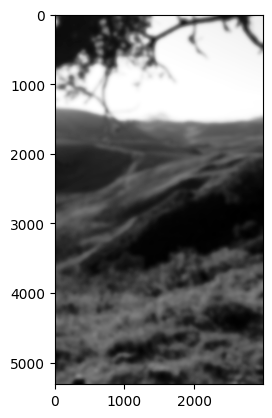

In [105]:
gauss_blur_img = cv2.GaussianBlur(img, (175, 175), 0)
plt.imshow(gauss_blur_img, cmap="Greys_r")
plt.show()

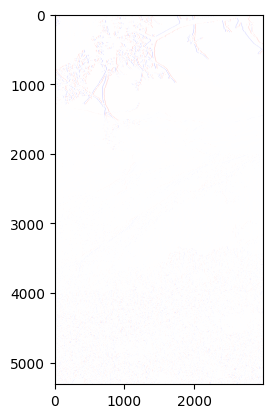

In [112]:
horiz_grad_kernel = .5 * np.array([-1.0, 0.0, 1.0])
horiz_grad_kernel = horiz_grad_kernel.reshape(1, horiz_grad_kernel.shape[0])
horiz_grad_img = cv2.filter2D((img / 255.0), -1, kernel=horiz_grad_kernel)

plt.imshow(horiz_grad_img, cmap="bwr")
plt.show()

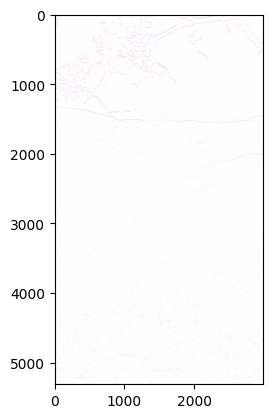

In [113]:
vert_grad_kernel = .5 * np.array([-1.0, 0.0, 1.0])
vert_grad_kernel = vert_grad_kernel.reshape(vert_grad_kernel.shape[0], 1)
vert_grad_img = cv2.filter2D((img / 255.0), -1, kernel=vert_grad_kernel)

plt.imshow(vert_grad_img, cmap="bwr")
plt.show()

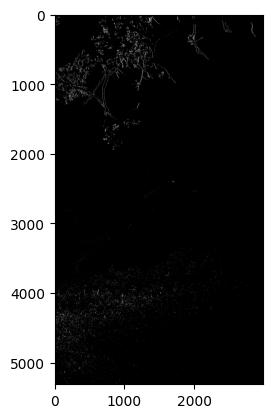

In [126]:
plt.imshow(np.abs(horiz_grad_img) > 0.2, cmap="Greys_r")
plt.show()

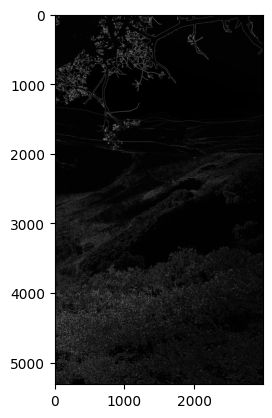

In [133]:
plt.imshow(np.sqrt((horiz_grad_img**2) + (vert_grad_img**2)), cmap="Greys_r")
plt.show()

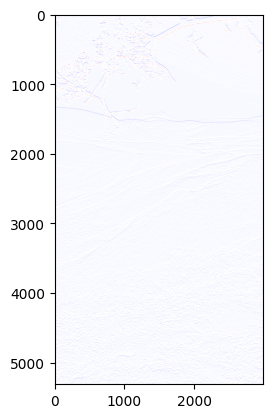

In [132]:
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype="float")
sobel_img = cv2.filter2D((img / 255.0), -1, kernel=sobel_kernel)

plt.imshow(sobel_img, cmap="bwr")
plt.show()

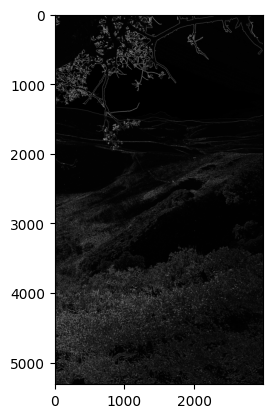

In [135]:
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype="float")

horiz_sobel_img = cv2.filter2D((img / 255.0), -1, kernel=sobel_kernel)
vert_sobel_img = cv2.filter2D((img / 255.0), -1, kernel=sobel_kernel.T)

plt.imshow(np.sqrt((horiz_sobel_img**2) + (vert_sobel_img**2)), cmap="Greys_r")
plt.show()

C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14432\3830303183.py:1: RuntimeWarning: divide by zero encountered in divide
  max_gradient_img = np.arctan(vert_grad_img / horiz_grad_img)
C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14432\3830303183.py:1: RuntimeWarning: invalid value encountered in divide
  max_gradient_img = np.arctan(vert_grad_img / horiz_grad_img)


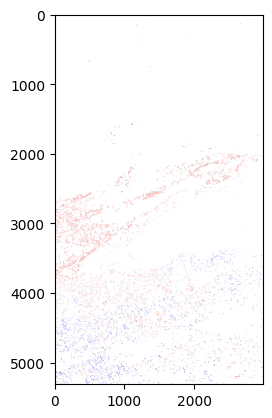

In [142]:
max_gradient_img = np.arctan(vert_grad_img / horiz_grad_img)
plt.imshow(max_gradient_img, cmap="bwr")
plt.show()

C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14432\1191161101.py:1: RuntimeWarning: divide by zero encountered in divide
  sobel_max_gradient_img = np.arctan(vert_sobel_img / horiz_sobel_img)
C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14432\1191161101.py:1: RuntimeWarning: invalid value encountered in divide
  sobel_max_gradient_img = np.arctan(vert_sobel_img / horiz_sobel_img)


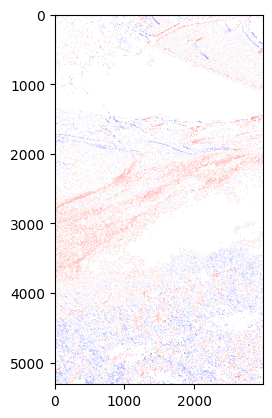

In [141]:
sobel_max_gradient_img = np.arctan(vert_sobel_img / horiz_sobel_img)
plt.imshow(sobel_max_gradient_img, cmap="bwr")
plt.show()

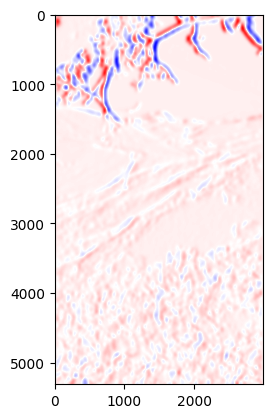

In [4]:
stand_dev = 25
half_region = int(3 * stand_dev)
full_region = (2 * half_region) + 1

v = np.arange(-1 * half_region, half_region + 1)[::-1]
v = v.reshape(v.shape[0], 1)
v = np.repeat(v, full_region, axis=1)

u = -1 * v.T

non_sqrt_euc = (v**2 + u**2)

def calc_DoG_kernel(directional_offsets, non_sqrt_euc, sigma):
    denom = -1 * (directional_offsets / (2 * np.pi * (sigma**2)))
    num = np.exp((-1 * non_sqrt_euc) / (2 * (sigma**2)))
    return denom * num

horiz_DoG_kernel = calc_DoG_kernel(u, non_sqrt_euc, stand_dev)
vert_DoG_kernel = calc_DoG_kernel(v, non_sqrt_euc, stand_dev)

horiz_DoG_img = cv2.filter2D((img / 255.0), -1, kernel=horiz_DoG_kernel)
vert_DoG_img = cv2.filter2D((img / 255.0), -1, kernel=vert_DoG_kernel)

plt.imshow(horiz_DoG_img, cmap="bwr")
plt.show()

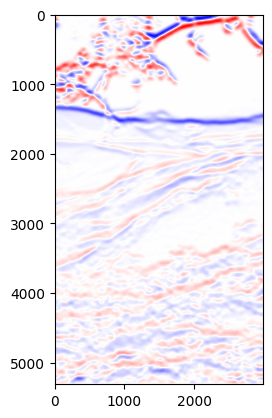

In [5]:
plt.imshow(vert_DoG_img, cmap="bwr")
plt.show()

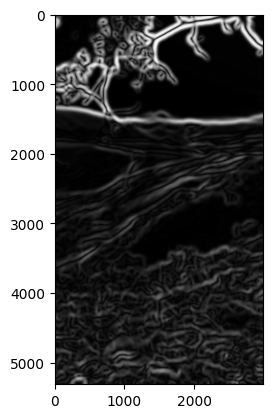

In [7]:
plt.imshow(np.sqrt(vert_DoG_img**2 + horiz_DoG_img**2), cmap="Greys_r")
plt.show()

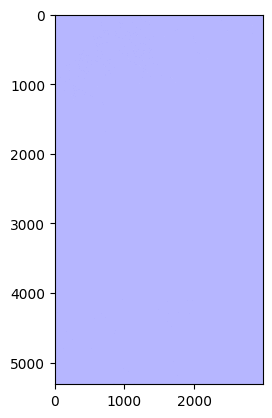

In [12]:
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype="float") * 0.5

laplacian_img = cv2.filter2D((img / 255.0), -1, kernel=laplacian_kernel)

plt.imshow(laplacian_img, cmap="bwr")
plt.show()

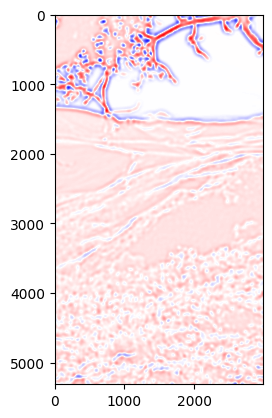

In [15]:
stand_dev = 25
half_region = int(3 * stand_dev)
full_region = (2 * half_region) + 1

v = np.arange(-1 * half_region, half_region + 1)[::-1]
v = v.reshape(v.shape[0], 1)
v = np.repeat(v, full_region, axis=1)

u = -1 * v.T

non_sqrt_euc = (v**2 + u**2)

def calc_LoG_kernel(non_sqrt_euc, sigma):
    first_term = 1 / (np.pi * (sigma**4))
    second_term = (non_sqrt_euc / (2 * (sigma**2))) - 1
    third_term = np.exp((-1 * non_sqrt_euc) / (2 * (sigma**2)))
    return first_term * second_term * third_term

LoG_kernel = calc_LoG_kernel(non_sqrt_euc, stand_dev)

LoG_img = cv2.filter2D((img / 255.0), -1, kernel=LoG_kernel)

plt.imshow(LoG_img, cmap="bwr")
plt.show()

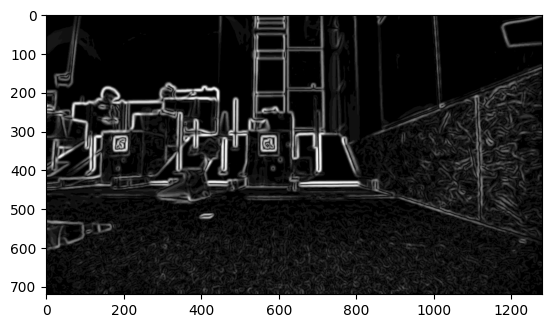

In [114]:
gauss_blur_img = cv2.GaussianBlur(cv2.equalizeHist(img2) / 255.0, (15, 15), 0)

DoG_x_img = cv2.Sobel(
    gauss_blur_img, cv2.CV_16S, 1, 0, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT
)
DoG_y_img = cv2.Sobel(
    gauss_blur_img, cv2.CV_16S, 0, 1, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT
)

plt.imshow(np.sqrt((DoG_y_img**2) + (DoG_x_img**2)), cmap="Greys_r")
plt.show()

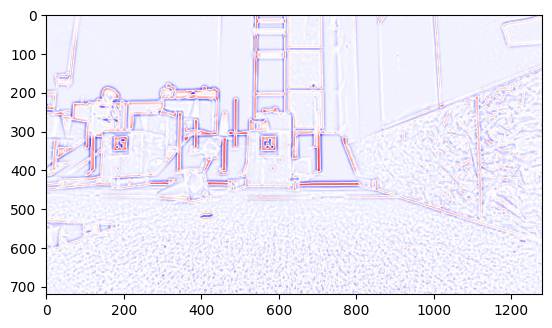

In [115]:
gauss_blur_img = cv2.GaussianBlur(cv2.equalizeHist(img2), (15, 15), 0)

LoG_img = cv2.Laplacian(
    gauss_blur_img, ddepth=cv2.CV_16S, ksize=5
)

plt.imshow(LoG_img, cmap="bwr")
plt.show()

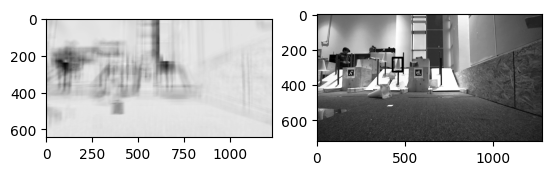

In [152]:
img2 = cv2.imread("frc_live_grid_shot.jpg", 0)

width, height = cone_template.shape[::-1]

temp_match = cv2.matchTemplate(img2, cone_template, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(temp_match)

top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)

cv2.rectangle(img2, top_left, bottom_right, 0, 10)

plt.subplot(121), plt.imshow(temp_match, cmap="Greys_r")
plt.subplot(122), plt.imshow(img2, cmap="Greys_r")

plt.show()
img2 = cv2.imread("frc_live_grid_shot.jpg", 0)

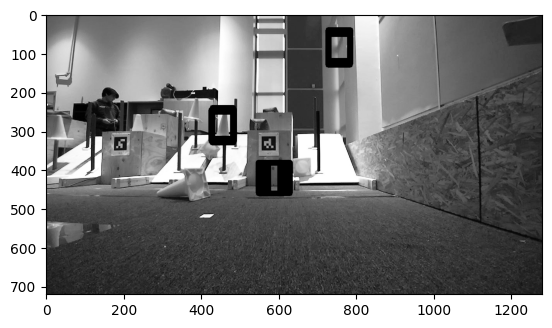

In [153]:
img2 = cv2.imread("frc_live_grid_shot.jpg", 0)
found_thesh = 0.93
findings = np.where(temp_match > found_thesh)

for found_point in zip(*findings[::-1]):
    cv2.rectangle(img2, found_point, (found_point[0] + width, found_point[1] + height), 0, 10)

plt.imshow(img2, cmap="Greys_r")
plt.show()
img2 = cv2.imread("frc_live_grid_shot.jpg", 0)

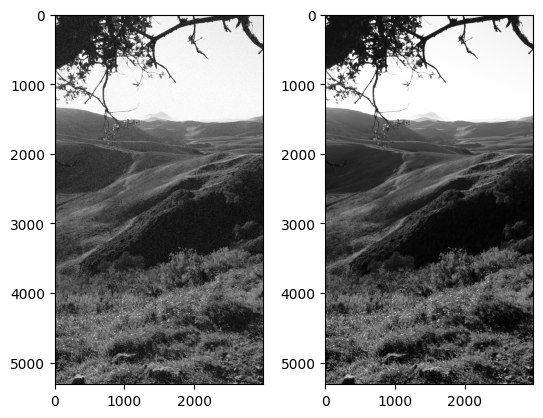

In [21]:
speckle_noise = np.random.uniform(0, 1, img.shape)
speckle_img = img.copy()
speckle_img = np.where(speckle_noise < 0.05, 0, speckle_img)
speckle_img = np.where(speckle_noise > 0.95, 255, speckle_img)

median_blur_img = cv2.medianBlur(speckle_img, 3)

plt.subplot(121)
plt.imshow(speckle_img, cmap="Greys_r")
plt.subplot(122)
plt.imshow(median_blur_img, cmap="Greys_r")
plt.show()

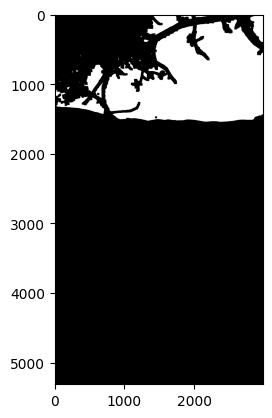

In [20]:
thresh_img = (cv2.equalizeHist(img) >= 200).astype("uint8")
erosion_kernel = np.ones((31, 31), np.uint8)
eroded_image = cv2.erode(thresh_img, erosion_kernel, iterations=1)
plt.imshow(eroded_image, cmap="Greys_r")
plt.show()

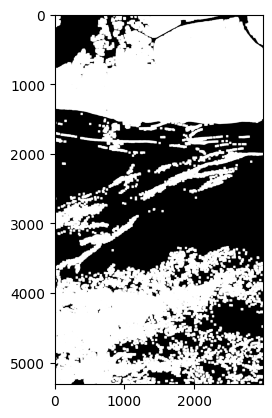

In [24]:
thresh_img = (cv2.equalizeHist(img) >= 200).astype("uint8")
dilation_kernel = np.ones((31, 31), np.uint8)
dilated_image = cv2.dilate(thresh_img, dilation_kernel, iterations=1)
plt.imshow(dilated_image, cmap="Greys_r")
plt.show()

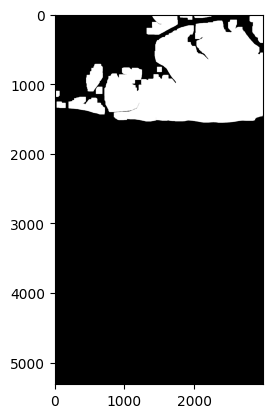

In [28]:
thresh_img = (cv2.equalizeHist(img) >= 200).astype("uint8")
opening_kernel = np.ones((65, 65), np.uint8)
opening_image = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, opening_kernel)
plt.imshow(opening_image, cmap="Greys_r")
plt.show()

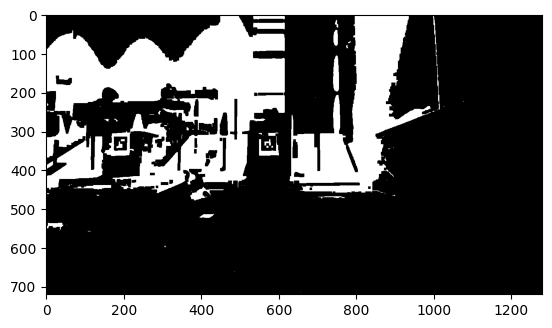

In [32]:
thresh_img = (cv2.equalizeHist(img2) >= 200).astype("uint8")
closing_kernel = np.ones((7, 7), np.uint8)
closing_image = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, closing_kernel)
plt.imshow(closing_image, cmap="Greys_r")
plt.show()

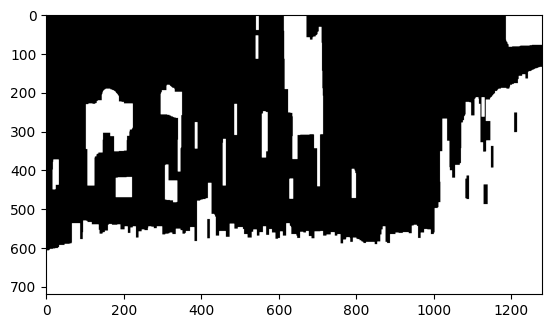

In [47]:
thresh_img = (cv2.equalizeHist(img2) <= 50).astype("uint8")
closing_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 50))
closing_image = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, closing_kernel)
closing_image = cv2.morphologyEx(closing_image, cv2.MORPH_OPEN, closing_kernel)
plt.imshow(closing_image, cmap="Greys_r")
plt.show()

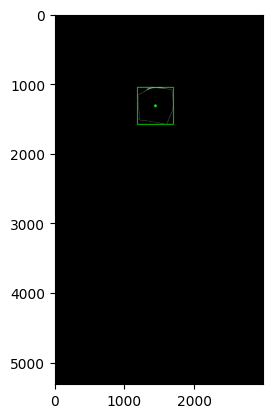

In [86]:
single_cube_img = cv2.imread("frc_game_cube.jpeg", 0)
cube_thresh_img = (single_cube_img >= 215).astype(np.float32)
white_pixels = np.argwhere(cube_thresh_img == 1)
min_v, min_u = white_pixels.min(axis=0)
max_v, max_u = white_pixels.max(axis=0)

mid_u = int((max_u + min_u) / 2)
mid_v = int((max_v + min_v) / 2)

cube_thresh_img = cv2.cvtColor(cube_thresh_img, cv2.COLOR_GRAY2RGB)
cv2.rectangle(
    cube_thresh_img,
    (min_u, min_v), (max_u, max_v),
    (0.0, 1.0, 0.0), 10
)
cv2.circle(img=cube_thresh_img, center=(mid_u, mid_v), radius=20, color=(0.0, 1.0, 0.0), thickness=-1)

plt.imshow(cube_thresh_img)
plt.show()

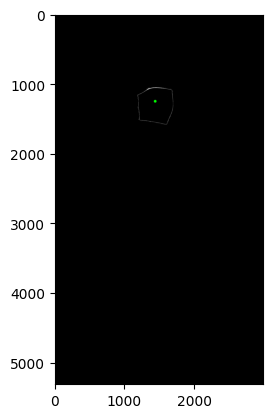

In [16]:
single_cube_img = cv2.imread("frc_game_cube.jpeg", 0)
cube_thresh_img = (single_cube_img >= 215).astype(np.float32)
cti_indices = np.indices(cube_thresh_img.shape)

zeroth_moment = cube_thresh_img.sum()
first_v_moment = (cube_thresh_img * cti_indices[0]).sum()
first_u_moment = (cube_thresh_img * cti_indices[1]).sum()

v_centroid = int(first_v_moment / zeroth_moment)
u_centroid = int(first_u_moment / zeroth_moment)

cube_thresh_img = cv2.cvtColor(cube_thresh_img, cv2.COLOR_GRAY2RGB)
cv2.circle(img=cube_thresh_img, center=(u_centroid, v_centroid), radius=20, color=(0.0, 1.0, 0.0), thickness=-1)

plt.imshow(cube_thresh_img)
plt.show()

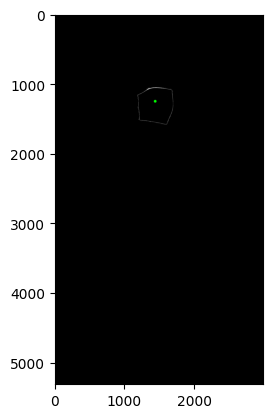

In [3]:
single_cube_img = cv2.imread("frc_game_cube.jpeg", 0)
cube_thresh_img = (single_cube_img >= 215).astype(np.float32)

cube_thresh_moments = cv2.moments(cube_thresh_img)

v_centroid = int(cube_thresh_moments["m01"] / cube_thresh_moments["m00"])
u_centroid = int(cube_thresh_moments["m10"] / cube_thresh_moments["m00"])

cube_thresh_img = cv2.cvtColor(cube_thresh_img, cv2.COLOR_GRAY2RGB)
cv2.circle(img=cube_thresh_img, center=(u_centroid, v_centroid), radius=20, color=(0.0, 1.0, 0.0), thickness=-1)

plt.imshow(cube_thresh_img)
plt.show()

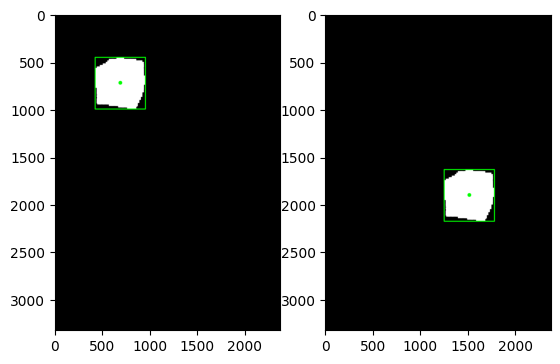

In [55]:
multi_cube_img = cv2.imread("frc_multi_cube.jpg", 0)
multi_thresh_img = (multi_cube_img >= 15).astype(np.uint8)

blobs = cv2.connectedComponents(multi_thresh_img)
# 1, 6
blob_1_img = (blobs[1] == 1).astype(np.float32)

white_pixels = np.argwhere(blob_1_img == 1)
min_v, min_u = white_pixels.min(axis=0)
max_v, max_u = white_pixels.max(axis=0)

mid_u = int((max_u + min_u) / 2)
mid_v = int((max_v + min_v) / 2)

blob_1_moments = cv2.moments(blob_1_img)

v_centroid = int(blob_1_moments["m01"] / blob_1_moments["m00"])
u_centroid = int(blob_1_moments["m10"] / blob_1_moments["m00"])

blob_1_img = cv2.cvtColor(blob_1_img, cv2.COLOR_GRAY2RGB)
cv2.rectangle(
    blob_1_img,
    (min_u, min_v), (max_u, max_v),
    (0.0, 1.0, 0.0), 10
)
cv2.circle(img=blob_1_img, center=(u_centroid, v_centroid), radius=20, color=(0.0, 1.0, 0.0), thickness=-1)

###

blob_2_img = (blobs[1] == 6).astype(np.float32)

white_pixels = np.argwhere(blob_2_img == 1)
min_v, min_u = white_pixels.min(axis=0)
max_v, max_u = white_pixels.max(axis=0)

mid_u = int((max_u + min_u) / 2)
mid_v = int((max_v + min_v) / 2)

blob_2_moments = cv2.moments(blob_2_img)

v_centroid = int(blob_2_moments["m01"] / blob_2_moments["m00"])
u_centroid = int(blob_2_moments["m10"] / blob_2_moments["m00"])

blob_2_img = cv2.cvtColor(blob_2_img, cv2.COLOR_GRAY2RGB)
cv2.rectangle(
    blob_2_img,
    (min_u, min_v), (max_u, max_v),
    (0.0, 1.0, 0.0), 10
)
cv2.circle(img=blob_2_img, center=(u_centroid, v_centroid), radius=20, color=(0.0, 1.0, 0.0), thickness=-1)

plt.subplot(121)
plt.imshow(blob_1_img)
plt.subplot(122)
plt.imshow(blob_2_img)
plt.show()

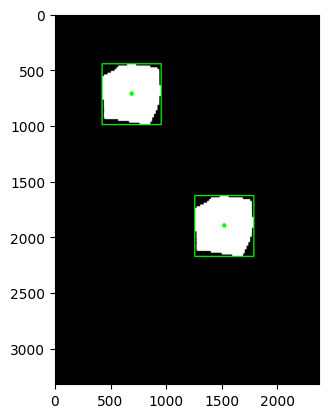

In [87]:
multi_cube_img = cv2.imread("frc_multi_cube.jpg", 0)
multi_thresh_img = (multi_cube_img >= 15).astype(np.uint8)

blobs = cv2.connectedComponentsWithStats(multi_thresh_img)
multi_thresh_img = cv2.cvtColor(multi_thresh_img.astype(np.float32), cv2.COLOR_GRAY2RGB)

blob_ids = [1, 6]
for blob_id in blob_ids:
    bbox = blobs[2][blob_id, :]
    u_min, v_min = bbox[:2]
    u_max, v_max = bbox[:2] + bbox[2: 4]

    u_centroid, v_centroid = blobs[3][blob_id, :].astype("int")

    cv2.rectangle(
        multi_thresh_img,
        (u_min, v_min), (u_max, v_max),
        (0.0, 1.0, 0.0), 10
    )
    cv2.circle(
        img=multi_thresh_img, center=(u_centroid, v_centroid),
        radius=20, color=(0.0, 1.0, 0.0), thickness=-1
    )

plt.imshow(multi_thresh_img)
plt.show()

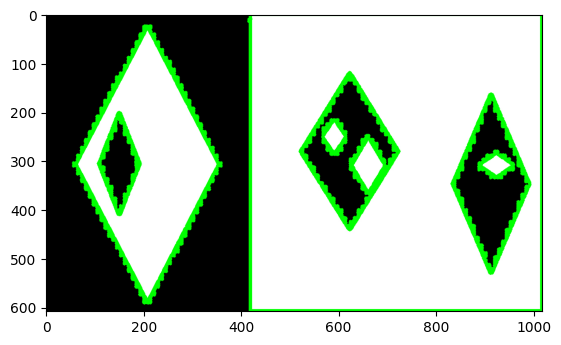

In [13]:
nested_diamond_img = cv2.imread("hierarchy_test.jpg", 0)

nd_contours, nd_cont_hierarchy = cv2.findContours(
    nested_diamond_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE
)

nested_diamond_img = cv2.cvtColor(nested_diamond_img, cv2.COLOR_GRAY2RGB)

cv2.drawContours(nested_diamond_img, nd_contours, -1, (0, 255, 0), 5)

plt.imshow(nested_diamond_img)
plt.show()

In [6]:
matrix = np.array([[1, 0], [3, 4]])
eig_values, eig_vectors = np.linalg.eig(matrix)
np.dot(matrix, eig_vectors[:, 0])
#eig_values

array([0., 4.])

In [36]:
def cent_moment_calculator(p, q, img, centroid):
    u_inds, v_inds = np.indices(img.shape)
    v_inds_centered = v_inds - centroid[0]
    u_inds_centered = u_inds - centroid[1]

    cent_moment_full = (u_inds_centered**p) * (v_inds_centered**q) * img
    return np.sum(cent_moment_full)
    

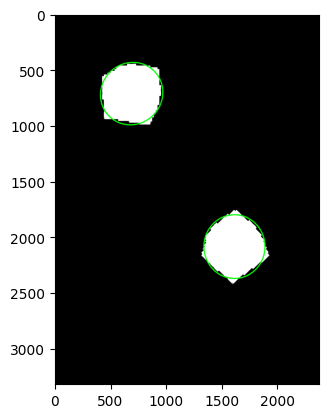

In [132]:
multi_cube_img = cv2.imread("frc_multi_cube_rot.jpg", 0)
multi_thresh_img = (multi_cube_img >= 15).astype(np.uint8)

blobs = cv2.connectedComponentsWithStats(multi_thresh_img)
# 1, 6
blob_1_img = (blobs[1] == 1).astype(np.float32)
blob_1_centroid = blobs[3][1]
blob_2_img = (blobs[1] == 5).astype(np.float32)
blob_2_centroid = blobs[3][5]

blob_1_inertia_matrix = np.array([
    [cent_moment_calculator(2, 0, blob_1_img, blob_1_centroid),
     cent_moment_calculator(1, 1, blob_1_img, blob_1_centroid)],
    [cent_moment_calculator(1, 1, blob_1_img, blob_1_centroid),
     cent_moment_calculator(0, 2, blob_1_img, blob_1_centroid)]
])

blob_2_inertia_matrix = np.array([
    [cent_moment_calculator(2, 0, blob_2_img, blob_2_centroid),
     cent_moment_calculator(1, 1, blob_2_img, blob_2_centroid)],
    [cent_moment_calculator(1, 1, blob_2_img, blob_2_centroid),
     cent_moment_calculator(0, 2, blob_2_img, blob_2_centroid)]
])

blob_1_eig_values, blob_1_eig_vectors = np.linalg.eig(blob_1_inertia_matrix)
blob_2_eig_values, blob_2_eig_vectors = np.linalg.eig(blob_2_inertia_matrix)

blob_1_zeroth_mom = cv2.moments(blob_1_img)["m00"]
blob_2_zeroth_mom = cv2.moments(blob_2_img)["m00"]

blob_1_a = 2 * np.sqrt(np.max(blob_1_eig_values) / blob_1_zeroth_mom)
blob_1_b = 2 * np.sqrt(np.min(blob_1_eig_values) / blob_1_zeroth_mom)
blob_1_major_eig_vect = blob_1_eig_vectors[:, np.argmax(blob_1_eig_values)]
blob_1_theta = np.arctan(blob_1_major_eig_vect[0] / blob_1_major_eig_vect[1])
blob_1_aspect_ratio = blob_1_b / blob_1_a

blob_2_a = 2 * np.sqrt(np.max(blob_2_eig_values) / blob_2_zeroth_mom)
blob_2_b = 2 * np.sqrt(np.min(blob_2_eig_values) / blob_2_zeroth_mom)
blob_2_major_eig_vect = blob_2_eig_vectors[:, np.argmax(blob_2_eig_values)]
blob_2_theta = np.arctan(blob_2_major_eig_vect[0] / blob_2_major_eig_vect[1])
blob_2_aspect_ratio = blob_2_b / blob_2_a

multi_thresh_img = cv2.cvtColor(multi_thresh_img * 255, cv2.COLOR_GRAY2RGB)

cv2.ellipse(
    img=multi_thresh_img,\
    center=blob_1_centroid.astype("int"),
    axes=(int(blob_1_a), int(blob_1_b)),
    angle=np.degrees(blob_1_theta),
    startAngle=0,
    endAngle=360,
    color=(0, 255, 0),
    thickness=10
)

cv2.ellipse(
    img=multi_thresh_img,\
    center=blob_2_centroid.astype("int"),
    axes=(int(blob_2_a), int(blob_2_b)),
    angle=np.degrees(blob_2_theta),
    startAngle=0,
    endAngle=360,
    color=(0, 255, 0),
    thickness=10
)

plt.imshow(multi_thresh_img)
plt.show()

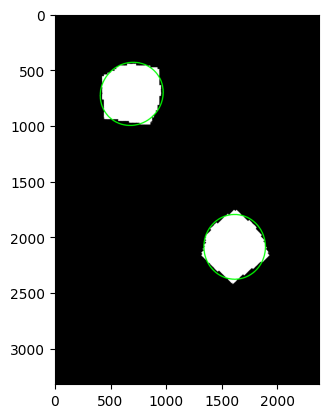

In [133]:
multi_cube_img = cv2.imread("frc_multi_cube_rot.jpg", 0)
multi_thresh_img = (multi_cube_img >= 15).astype(np.uint8)

multi_contours, multi_cont_hierarchy = cv2.findContours(
    multi_thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE
)

blob_1_ellipse = cv2.fitEllipse(multi_contours[-1])
blob_2_ellipse = cv2.fitEllipse(multi_contours[36])

multi_thresh_img = cv2.cvtColor(multi_thresh_img * 255, cv2.COLOR_GRAY2RGB)

cv2.ellipse(
    multi_thresh_img, blob_1_ellipse, color=(0, 255, 0),
    thickness=10
)
cv2.ellipse(
    multi_thresh_img, blob_2_ellipse, color=(0, 255, 0),
    thickness=10
)

plt.imshow(multi_thresh_img)
plt.show()

In [5]:
multi_cube_img = cv2.imread("frc_multi_cube_rot.jpg", 0)
multi_thresh_img = (multi_cube_img >= 15).astype(np.uint8)

multi_contours, multi_cont_hierarchy = cv2.findContours(
    multi_thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE
)

blob_1_cont = multi_contours[-1]
blob_1_area = cv2.moments(blob_1_cont)["m00"]
blob_1_perim_length = cv2.arcLength(blob_1_cont, closed=True)
blob_1_circularity = (4 * np.pi * blob_1_area) / (blob_1_perim_length**2)

blob_2_cont = multi_contours[-36]
blob_2_area = cv2.moments(blob_2_cont)["m00"]
blob_2_perim_length = cv2.arcLength(blob_2_cont, closed=True)
blob_2_circularity = (4 * np.pi * blob_2_area) / (blob_2_perim_length**2)

print(blob_1_circularity)
print(blob_2_circularity)

0.5568646432168666
0.7853981902804831
